# DS-NYC-45 | Unit Project 1: Research Design Write-Up

In this first unit project you will create a framework to scope out data science projects.  This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

## Part A.  Evaluate the following problem statement:

> "Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and `activity score 1 = active user`, `0 = inactive user`) based on Hooli data from January-April 2015."

> ### Question 1.  What is the outcome?

Answer: Return a convert-to-paying predictor indicator (yes or no)

> ### Question 2.  What are the predictors/covariates?

Answer: Age, gender, location, profession, days since last log in, and activity score (1 or 0)

> ### Question 3.  What timeframe is this data relevent for?

Answer: January 2015 - April 2015

> ### Question 4.  What is the hypothesis?

Answer: Demographic and customer usage data will allow us to predict if a free-tier customer will convert to a paying customer.

## Part B.  Let's start exploring our UCLA dataset and answer some simple questions:

In [1]:
import os
import pandas as pd

df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


> ### Question 5.  Create a data dictionary.

Answer: (Use the template below)

column name | Variable | Description | Type of Variable
---|---|---|---
admit | Whether or not an applicant was admitted | 0 = Not admitted, 1 = Admitted | Categorical
gre | Applicant's GRE score | 200 - 800 | Continuous
gpa | Applicant's GPA | 0.00 - 4.00 | Continuous
prestige | Rating of applicant's alma mater, with lower score indicating higher status | 1, 2, 3, or 4 | Categorical

We would like to explore the association between X and Y.

> ### Question 6.  What is the outcome?

Answer: Return applicant admittance indicator (yes or no)

> ### Question 7.  What are the predictors/covariates?

Answer: GRE, GPA, and prestige score

> ### Question 8.  What timeframe is this data relevent for?

Answer: ??? Unable to find

> ### Question 9.  What is the hypothesis?

Answer: GRE, GPA, and prestige score data will allow us to predict if an applicant will be admitted

> ### Question 10.  What's the problem statement?

> Using your answers to the above questions, write a well-formed problem statement.

Answer: Using UCLA data from X/XX/XX - Y/YY/YY, determine how likely applicants are to be admitted into UCLA graduate school using applicant data (GRE, GPA, and prestige score).

## Part C.  Create an exploratory analysis plan by answering the following questions:

Because the answers to these questions haven't yet been covered in class yet, this section is optional.  This is by design.  By having you guess or look around for these answers will help make sense once we cover this material in class.  You will not be penalized for wrong answers but we encourage you to give it a try!

> ### Question 11. What are the goals of the exploratory analysis?

Answer: There are several goals of exploratory analysis:
    1. Identify outliers
    2. Identify the shape of the distribution
    3. Make sure the data makes sense (values are within expected ranges)
    4. Identify missing values
    5. Identify the data types
   
Data Questions:
    1. What is the timeframe?
    2. Which grad school program did each applicant apply to? (Law, Med, Arts, etc.)
    3. What other data can we get that might be relevant? ex: undergrad major, date of application

In [36]:
df.dtypes

admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object

In [41]:
df.min()

admit         0.00
gre         220.00
gpa           2.26
prestige      1.00
dtype: float64

In [52]:
df.max()

admit         1.0
gre         800.0
gpa           4.0
prestige      4.0
dtype: float64

In [53]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


It appears there may be missing data. Admit column has 400 items, while the other three each have fewer than 400.

In [64]:
df[df.isnull().any(axis=1)]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


> ### Question 12.  What are the assumptions of the distribution of data?

Answer: 
1. Admit should only be values 0 and 1, and I assume that there will be more 0's than 1's (in other words, acceptance rate will likely be lower than 50%)
2. GPA will likely be roughly normally distributed
3. GPA between 2 and 4, with most scores above 3 (assuming college students with higher GPA's are more likely to apply to grad school)
4. Prestige should return only values 1, 2, 3, or 4. 
5. Admitted applicant data will skew more right for GPA and GRE, and more left for prestige, while non-admitted applicant data will be the opposite

> ### Question 13.  How will determine the distribution of your data?

Answer: Histograms are a good tool to determine the distribution of the data. We can explore the distribution of the total data, and we can also explore the distribution of the admit == 0 and admit == 1 data separately.

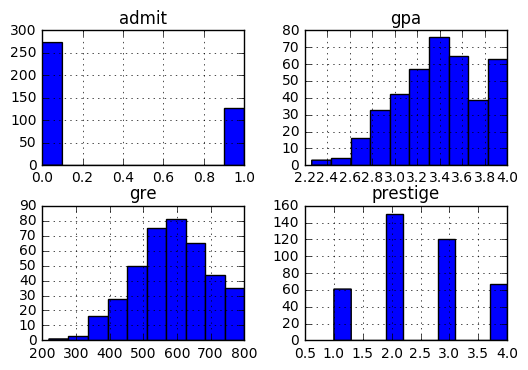

In [12]:
%matplotlib inline
df.hist();

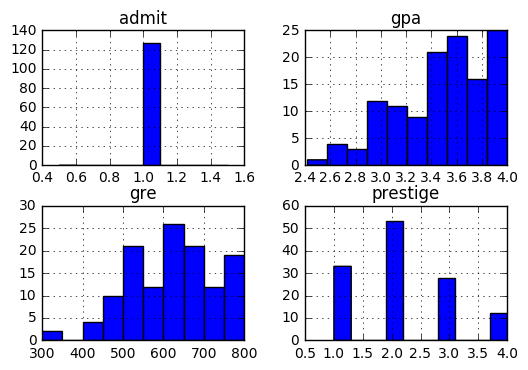

In [68]:
df[df.admit == 1].hist();

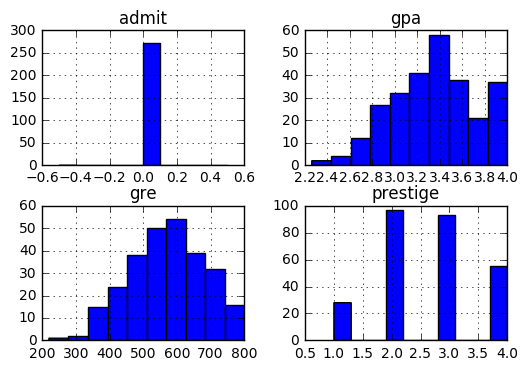

In [70]:
df[df.admit == 0].hist();

> ### Question 14.  How might outliers impact your analysis?

Answer: Outliers might skew correlations, means, distributions, and visualizations

> ### Question 15.  How will you test for outliers?

Answer: I will separately graph admit == 1 and admit == 0 data, similar to histograms above. Admitted applicant(s) with GRE below 400 might be an outlier.

In [74]:
df[(df.admit == 1) & (df.gre < 400)]

,admit,gre,gpa,prestige
315,1,300.0,2.84,2.0
316,1,340.0,3.00,2.0


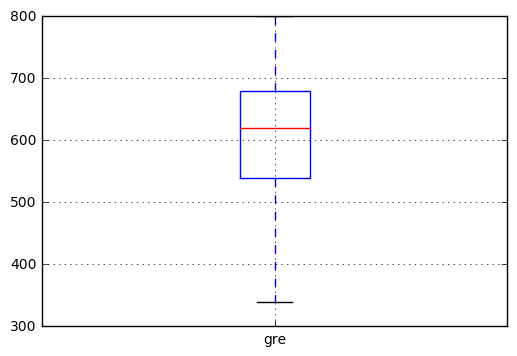

In [84]:
df[df.admit == 1].boxplot(column='gre', return_type='axes');

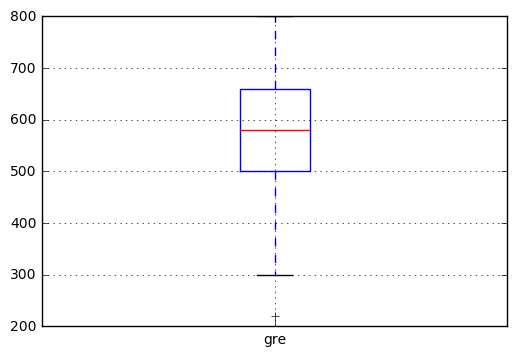

In [85]:
df[df.admit == 0].boxplot(column='gre', return_type='axes');

> ### Question 16.  What is colinearity?

Answer: When two or more predictors are highly correlated

> ### Question 17.  How will you test for covariance?

Answer: Covariance matrix as follows:

In [14]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


> ### Question 18.  What is your exploratory analysis plan?

> Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis one year from now.

Answer:

### **Missing Values**
- ID missing values with isnull()
- Document how to treat missing values. My plan with this data would be to exclude missing data
- Therefore, create a new dataframe which is a copy of the original dataframe without missing data

### **Visualizations: Data shape & outliers**
- Document expected distributions
- Use visualizations (boxplots and histograms) to test for outliers and determine data shape
- Document plan to handle outliers (include or exclude). My plan with this data would be to include outliers
- 

### **Test for multicollinearity**
- In this document there are two tests for covariance. One is df.corr(), and the other is sm.ols(). The former implies that GPA and GRE are correlated. The latter gives the warning "The condition number is large, 6.02e+03. This might indicate that there are strong multicollinearity or other numerical problems."
- Determine how to procede. Exclude a variable to avoid problem? Something else?



In [24]:
import statsmodels.formula.api as sm

In [25]:
regr = sm.ols(formula='admit ~ gre + gpa + prestige', data=df).fit()

In [26]:
print regr.summary()

                            OLS Regression Results                            
Dep. Variable:                  admit   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     13.69
Date:                Tue, 13 Dec 2016   Prob (F-statistic):           1.65e-08
Time:                        10:43:26   Log-Likelihood:                -239.99
No. Observations:                 397   AIC:                             488.0
Df Residuals:                     393   BIC:                             503.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1610      0.218     -0.737      0.4